In [82]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [83]:
url="/content/drive/MyDrive/NBA_2024_per_game.csv"


In [102]:
# Load the NBA.csv into a pandas dataframe, call it nba_df, and display the first five rows.
nba_df=pd.read_csv(url)

In [85]:
nba_df.head()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Joel Embiid,C,29,PHI,7,7,33.6,11.3,21.3,0.53,...,844.00,2.3,8.6,10.9,5.9,0.7,2.3,3.7,2.4,31.7
1,Devin Booker,SG,27,PHO,2,2,36.0,11.5,20.0,575.00,...,1.00,1.0,6.5,7.5,10.5,0.5,0.0,5.5,4.0,31.5
2,Luka Don?i?,PG,24,DAL,8,8,37.4,10.5,21.8,483.00,...,773.00,0.8,8.5,9.3,8.8,1.4,0.6,4.9,2.3,31.5
3,De'Aaron Fox,PG,26,SAC,3,3,35.3,11.3,23.3,486.00,...,0.81,1.0,3.3,4.3,6.0,1.3,0.7,2.7,4.0,31.3
4,Donovan Mitchell,SG,27,CLE,7,7,35.9,11.1,21.9,0.51,...,897.00,1.1,3.7,4.9,5.6,2.3,0.6,2.7,2.1,30.7


In [103]:
# Use one command to derive and state the total number of  features in this dataset,
# the number of different types of features, and the number of null values.
nba_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 461 entries, 0 to 460
Data columns (total 29 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  461 non-null    object 
 1   Pos     461 non-null    object 
 2   Age     461 non-null    int64  
 3   Tm      461 non-null    object 
 4   G       461 non-null    int64  
 5   GS      461 non-null    int64  
 6   MP      461 non-null    float64
 7   FG      461 non-null    float64
 8   FGA     461 non-null    float64
 9   FG%     448 non-null    float64
 10  3P      461 non-null    float64
 11  3PA     461 non-null    float64
 12  3P%     392 non-null    float64
 13  2P      461 non-null    float64
 14  2PA     461 non-null    float64
 15  2P%     434 non-null    float64
 16  eFG%    448 non-null    float64
 17  FT      461 non-null    float64
 18  FTA     461 non-null    float64
 19  FT%     372 non-null    float64
 20  ORB     461 non-null    float64
 21  DRB     461 non-null    float64
 22  TR

In [104]:
# From the above code, notice that your object dtype may need to be converted to string dtype. Go ahead and do so,
# and then verify that it is done using a different command from .info()
nba_df[['Player','Pos','Age', 'Tm']]=nba_df[['Player','Pos','Age', 'Tm']].astype('string')

In [88]:
nba_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 461 entries, 0 to 460
Data columns (total 29 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  461 non-null    string 
 1   Pos     461 non-null    string 
 2   Age     461 non-null    string 
 3   Tm      461 non-null    string 
 4   G       461 non-null    int64  
 5   GS      461 non-null    int64  
 6   MP      461 non-null    float64
 7   FG      461 non-null    float64
 8   FGA     461 non-null    float64
 9   FG%     448 non-null    float64
 10  3P      461 non-null    float64
 11  3PA     461 non-null    float64
 12  3P%     392 non-null    float64
 13  2P      461 non-null    float64
 14  2PA     461 non-null    float64
 15  2P%     434 non-null    float64
 16  eFG%    448 non-null    float64
 17  FT      461 non-null    float64
 18  FTA     461 non-null    float64
 19  FT%     372 non-null    float64
 20  ORB     461 non-null    float64
 21  DRB     461 non-null    float64
 22  TR

In [89]:
nba_df.sample(3)

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
32,Zion Williamson,PF,23,NOP,6,6,32.0,9.0,17.8,505.0,...,605.0,3.3,3.7,7.0,4.7,0.8,0.0,2.0,2.3,21.8
46,Tobias Harris,SF,31,PHI,7,7,36.3,6.9,11.4,0.6,...,882.0,0.9,5.6,6.4,2.7,1.1,0.6,2.3,1.9,19.3
35,Scottie Barnes,SG,22,TOR,8,8,36.9,8.0,16.5,485.0,...,757.0,3.0,7.4,10.4,6.0,1.5,2.1,2.9,2.5,21.5


In [90]:
# Find the number of games played by each player.
# Note that feature G identifies the games played. For more info on each feature see here.
games_played=nba_df.groupby('Player')['G'].sum()
games_played.head()

Player
A.J. Green       3
AJ Griffin       5
Aaron Gordon     9
Aaron Holiday    5
Aaron Nesmith    8
Name: G, dtype: int64

In [106]:
# Sort the above dataset from highest to lowest to find the top 10 players that played the most games.
games_played.sort_values(ascending = False).head(10)


Player
Robert Covington    14
P.J. Tucker         12
KJ Martin           10
Nicolas Batum       10
DeMar DeRozan        9
Chris Paul           9
Marcus Sasser        9
Kelly Olynyk         9
Nikola Joki?         9
Torrey Craig         9
Name: G, dtype: int64

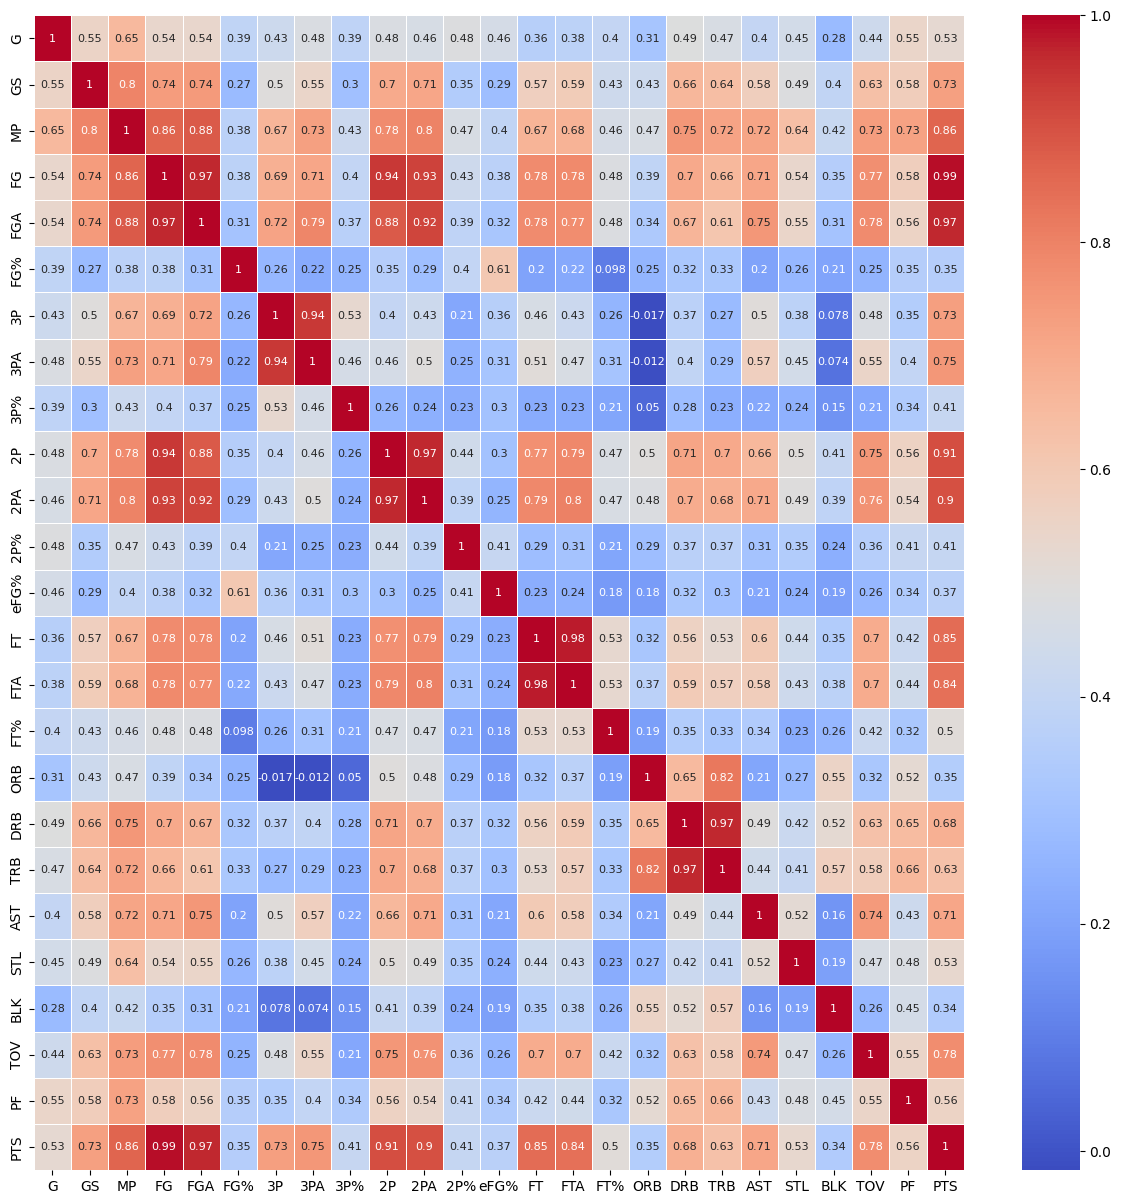

In [107]:
# Visualize the correlation for all the numeric columns.
plt.figure(figsize= (15, 15))
sns.heatmap(nba_df.corr(numeric_only = True), annot=True, cmap="coolwarm", linewidths=.5, annot_kws={"size": 8})
plt.show()

